In [6]:
!pip install -qU langchain langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00


In [16]:
from typing import TypedDict
class State(TypedDict):
  number: int
  message: str

In [26]:
def node_1(state:State):
  return {"number":state["number"],"message":f"You entered the number is {state['number']}"}
def even_node(state:State):
  return {"number":state["number"],"message":f"You entered the number is {state['number']}.This is an even number"}
def odd_node(state:State):
  return {"number":state["number"],"message":f"You entered the number is {state['number']}.This is an odd number"}

In [27]:
from typing import Literal
def decide_even_odd(state:State) -> Literal['even_node','odd_node'] :
  if state['number'] % 2 == 0:
    return 'even_node'
  else:
    return 'odd_node'

In [28]:
from langgraph.graph import StateGraph,START,END
builder: StateGraph = StateGraph(State)
builder.add_node("node_1",node_1)
builder.add_node('even_node',even_node)
builder.add_node('odd_node',odd_node)

In [29]:
builder.add_edge(START,'node_1')
builder.add_conditional_edges('node_1',decide_even_odd)
builder.add_edge('even_node',END)
builder.add_edge('odd_node',END)
graph = builder.compile()

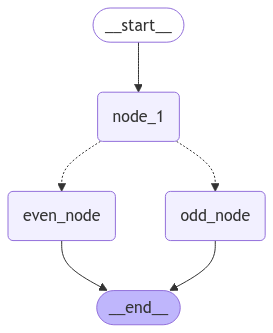

In [30]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [33]:
result = graph.invoke({"number":13,"message":"Hello"})

In [34]:
result

{'number': 13, 'message': 'You entered the number is 13.This is an odd number'}